In [0]:
import numpy as np
import h5py
import tensorflow as tf


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, ReLU, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#read file using h5py as this is dataset is of type .h5 
data = h5py.File('/content/drive/My Drive/ML/NNDL/SVHN_single_grey1.h5', 'r')

In [9]:
# h5py.File acts like a Python dictionary, thus we can check the keys,
list(data.keys())


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
X_test = data["X_test"][:]
# X_test.shape
X_train = data["X_train"][:]
y_train = data["y_train"][:]
y_test = data["y_test"][:]
X_val = data["X_val"][:]
y_val = data["y_val"][:]


In [0]:
data.close()

In [10]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [0]:
#Explore the dataset by printing some values from x and y train
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(0,9):
    print("Label: {}".format(y_train[i]))
# print("Label: {}".format(y_train[1000]))
# plt.imshow(X_train[66])


Label: 2
Label: 6
Label: 7
Label: 4
Label: 4
Label: 0
Label: 3
Label: 0
Label: 7


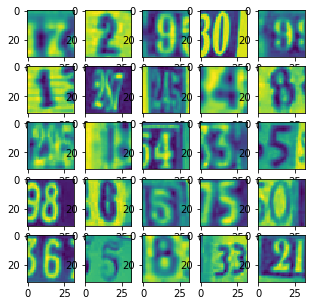

In [0]:
fig=plt.figure(figsize=(5, 5))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### Implement and apply an optimal k-Nearest Neighbor (kNN) classifier 


In [0]:
from sklearn.neighbors import KNeighborsClassifier 

In [0]:
# Create KNN object
knn = KNeighborsClassifier(n_neighbors=7)

In [0]:
X_train.shape[0]

42000

In [0]:
# Fit the dataset
knn.fit(X_train.reshape(X_train.shape[0], -1), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
# Print the accuracy score
knn_score = knn.score(X_test.reshape(X_test.shape[0], -1), y_test)
print("KNN Score =", knn_score)


KNN Score = 0.5070555555555556


In [0]:
# optimal k-Nearest Neighbor (kNN) classifier
neighbors = np.arange(2, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [0]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train.reshape(X_train.shape[0], -1), y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test.reshape(X_test.shape[0], -1), y_test)
    
    print("Neighbors = ", k, "Train Accuracy= ", train_accuracy[i], " Test Accuracy =  ", test_accuracy[i])
    

Neighbors =  2 Train Accuracy=  0.7208095238095238  Test Accuracy =   0.43644444444444447
Neighbors =  3 Train Accuracy=  0.6996904761904762  Test Accuracy =   0.4617777777777778
Neighbors =  4 Train Accuracy=  0.6894761904761905  Test Accuracy =   0.48133333333333334
Neighbors =  5 Train Accuracy=  0.6815952380952381  Test Accuracy =   0.49016666666666664
Neighbors =  6 Train Accuracy=  0.6687142857142857  Test Accuracy =   0.5008888888888889
Neighbors =  7 Train Accuracy=  0.6602142857142858  Test Accuracy =   0.5070555555555556
Neighbors =  8 Train Accuracy=  0.6516666666666666  Test Accuracy =   0.5117777777777778
Neighbors =  9 Train Accuracy=  0.646  Test Accuracy =   0.5124444444444445
Neighbors =  10 Train Accuracy=  0.6419523809523809  Test Accuracy =   0.5168333333333334


In [0]:
# Represent Classfication accuracy metrics using a plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

4. Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations)


In [0]:
# input image dimensions
img_rows, img_cols = 32, 32

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

#Normalizing the input
X_train /= 255
X_test /= 255
X_val /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_val.shape[0], 'val samples')

x_train shape: (42000, 32, 32, 1)
42000 train samples
18000 test samples
60000 val samples


In [14]:
np.unique(y_train), np.unique(y_test), np.unique(y_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [0]:
num_classes = len(np.unique(y_train))

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [17]:
# Create a Sequential Model
batch_size = 128
num_classes = 10

#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25,name='drop_1'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = SGD(lr=0.001, decay=1e-6, momentum=0.9)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [19]:
#Training on the dataset
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=20,
          #verbose=1,
          validation_data=(X_val, y_val))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 176s 4ms/step - loss: 2.3036 - acc: 0.1041 - val_loss: 2.3007 - val_acc: 0.1229
Epoch 2/20
42000/42000 [==============================] - 176s 4ms/step - loss: 2.3009 - acc: 0.1117 - val_loss: 2.2990 - val_acc: 0.1357
Epoch 3/20
42000/42000 [==============================] - 176s 4ms/step - loss: 2.2992 - acc: 0.1185 - val_loss: 2.2968 - val_acc: 0.1331
Epoch 4/20
42000/42000 [==============================] - 176s 4ms/step - loss: 2.2965 - acc: 0.1288 - val_loss: 2.2925 - val_acc: 0.1901
Epoch 5/20
42000/42000 [==============================] - 176s 4ms/step - loss: 2.2922 - acc: 0.1404 - val_loss: 2.2849 - val_acc: 0.2336
Epoch 6/20
42000/42000 [==============================] - 176s 4ms/step - loss: 2.2837 - acc: 0.1599 - val_loss: 2.2684 - val_acc: 0.2500
Epoch 7/20
42000/42000 [====

In [23]:
# Evaluate trained model on the test set

#Testing the model on test set
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18000/18000 [==============================] - 16s 908us/step
Test loss: 0.6148503668308258
Test accuracy: 0.8273333333333334


In [20]:
# Implement batch normalization for training the neural network

#Initialize the model
model_1 = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3
model_1.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=input_shape,name='conv_1'))
# Apply Batchnorm
model_1.add(keras.layers.BatchNormalization(name='batchnorm_1', epsilon=0.001, momentum=0.99))
# Apply ReLU activation
model_1.add(ReLU(name='relu_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 
model_1.add(Conv2D(64, (3, 3), name='conv_2'))
# Apply Batchnorm
model_1.add(keras.layers.BatchNormalization(name='batchnorm_2', epsilon=0.001, momentum=0.99))
# Apply ReLU activation
model_1.add(ReLU(name='relu_2'))

#Add a MaxPooling Layer of size 2X2 
model_1.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

# Apply Batchnorm
model_1.add(keras.layers.BatchNormalization(name='batchnorm_3', epsilon=0.001, momentum=0.99))

#Flatten the layer
model_1.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model_1.add(Dense(128, activation='relu',name='dense_1'))

# Apply Batchnorm
model_1.add(keras.layers.BatchNormalization(name='batchnorm_4', epsilon=0.001, momentum=0.99))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model_1.add(Dense(num_classes, activation='softmax',name='dense_2'))

In [0]:
#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.9)
#Set the loss function and optimizer for the model training
model_1.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [22]:
#Training on the dataset
model_1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          
          validation_data=(X_val, y_val))

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 343s 8ms/step - loss: 0.7526 - acc: 0.7673 - val_loss: 0.5474 - val_acc: 0.8303
Epoch 2/20
42000/42000 [==============================] - 341s 8ms/step - loss: 0.3783 - acc: 0.8891 - val_loss: 0.3751 - val_acc: 0.8908
Epoch 3/20
42000/42000 [==============================] - 340s 8ms/step - loss: 0.2828 - acc: 0.9178 - val_loss: 0.3064 - val_acc: 0.9104
Epoch 4/20
42000/42000 [==============================] - 339s 8ms/step - loss: 0.2182 - acc: 0.9372 - val_loss: 0.2339 - val_acc: 0.9355
Epoch 5/20
42000/42000 [==============================] - 344s 8ms/step - loss: 0.1682 - acc: 0.9528 - val_loss: 0.2595 - val_acc: 0.9258
Epoch 6/20
42000/42000 [==============================] - 345s 8ms/step - loss: 0.1246 - acc: 0.9664 - val_loss: 0.2058 - val_acc: 0.9428
Epoch 7/20
42000/42000 [==============================] - 344s 8ms/step - loss: 0.1016 - acc: 0.9720 - val_loss: 0.2002 - 

In [23]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 30, 30, 32)        128       
_________________________________________________________________
relu_1 (ReLU)                (None, 30, 30, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 64)        18496     
_________________________________________________________________
batchnorm_2 (BatchNormalizat (None, 28, 28, 64)        256       
_________________________________________________________________
relu_2 (ReLU)                (None, 28, 28, 64)        0         
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 14, 14, 64)       

In [28]:
#Testing the model on test set
score = model_1.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18000/18000 [==============================] - 36s 2ms/step
Test loss: 0.45223817893324625
Test accuracy: 0.9053888888888889


In [0]:
# Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics
print("KNN Accuracy = ", knn_accuracy)

In [30]:
print('CNN accuracy:', score[1])

CNN accuracy: 0.9053888888888889


In [31]:
print("CNN Accuracy is higher than KNN accuracy comparitively")

CNN Accuracy is higher than KNN accuracy comparitively
